In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
##Importing data
data <- read.csv("Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv")
##Overview of data
glimpse(data)

Observations: 2,334
Variables: 9
$ YEAR                  <int> 2015, 2015, 2015, 2015, 2015, 2015, 2015, 201...
$ MONTH                 <fct> JAN, JAN, JAN, JAN, JAN, JAN, JAN, JAN, JAN, ...
$ QUARTER               <fct> Q1, Q1, Q1, Q1, Q1, Q1, Q1, Q1, Q1, Q1, Q1, Q...
$ AIRLINE.NAME          <fct> AIR INDIA, AIR INDIA EXPRESS, INDIGO, JET AIR...
$ CARRIER.TYPE          <fct> DOMESTIC, DOMESTIC, DOMESTIC, DOMESTIC, DOMES...
$ PASSENGERS.TO.INDIA   <int> 258876, 95581, 68112, 320853, 37882, 5088, 0,...
$ PASSENGERS.FROM.INDIA <int> 274220, 116600, 74212, 332116, 42468, 6901, 0...
$ FREIGHT.TO.INDIA      <dbl> 3320.626, 0.000, 320.000, 4173.874, 0.000, 7....
$ FREIGHT.FROM.INDIA    <dbl> 4186.302, 0.000, 1812.000, 5383.515, 115.680,...


In [3]:
##Dimension of data
dim(data)

[1] 2334    9

In [4]:
##Checking for NA values
data%>%map(~sum(is.na(.)))

$YEAR
[1] 0

$MONTH
[1] 0

$QUARTER
[1] 0

$AIRLINE.NAME
[1] 0

$CARRIER.TYPE
[1] 0

$PASSENGERS.TO.INDIA
[1] 1

$PASSENGERS.FROM.INDIA
[1] 0

$FREIGHT.TO.INDIA
[1] 0

$FREIGHT.FROM.INDIA
[1] 0

In [5]:
##Replacing the NA value with zero
data<-data%>%replace_na(list(PASSENGERS.TO.INDIA=0))
data%>%map(~sum(is.na(.)))

$YEAR
[1] 0

$MONTH
[1] 0

$QUARTER
[1] 0

$AIRLINE.NAME
[1] 0

$CARRIER.TYPE
[1] 0

$PASSENGERS.TO.INDIA
[1] 0

$PASSENGERS.FROM.INDIA
[1] 0

$FREIGHT.TO.INDIA
[1] 0

$FREIGHT.FROM.INDIA
[1] 0

In [6]:
##Checking data type in each column
sapply(data,typeof)

YEAR                 MONTH               QUARTER 
            "integer"             "integer"             "integer" 
         AIRLINE.NAME          CARRIER.TYPE   PASSENGERS.TO.INDIA 
            "integer"             "integer"              "double" 
PASSENGERS.FROM.INDIA      FREIGHT.TO.INDIA    FREIGHT.FROM.INDIA 
            "integer"              "double"              "double"

In [7]:
##Changing all non integer numeric data to integer
data1<-data%>%mutate_all(type.convert)%>%mutate_if(is.double,as.integer)
sapply(data1,typeof)

YEAR                 MONTH               QUARTER 
            "integer"             "integer"             "integer" 
         AIRLINE.NAME          CARRIER.TYPE   PASSENGERS.TO.INDIA 
            "integer"             "integer"             "integer" 
PASSENGERS.FROM.INDIA      FREIGHT.TO.INDIA    FREIGHT.FROM.INDIA 
            "integer"             "integer"             "integer"

In [8]:
##Analysis on Passenger to India

##Summary
summary(data1$PASSENGERS.TO.INDIA)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1484    4954   24466   23284  402497 

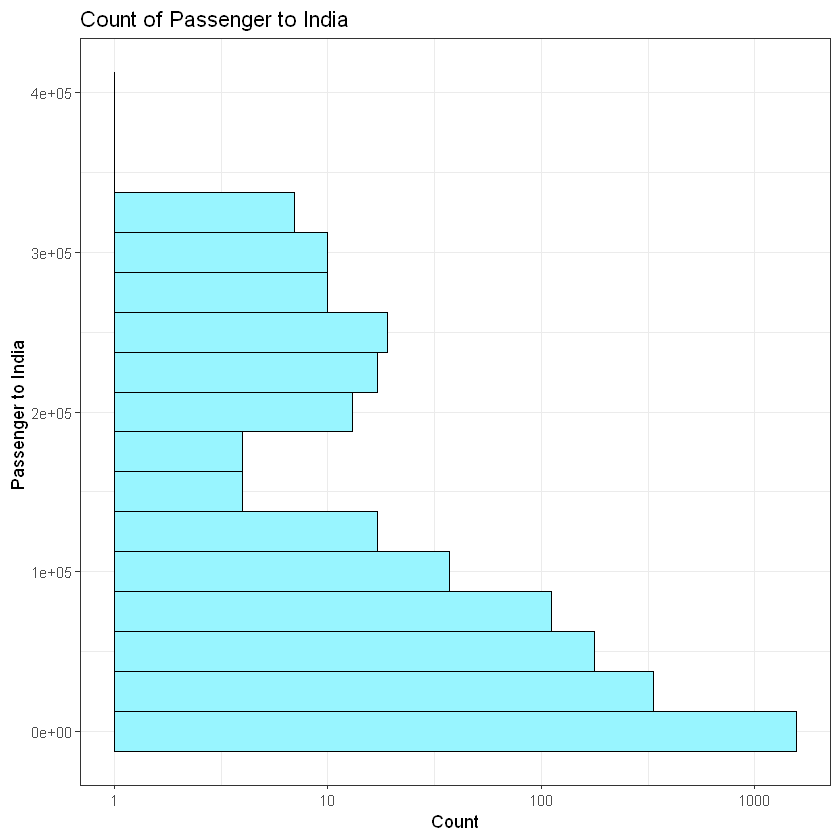

In [9]:
#Histogram showing passenger to India vs count
ggplot(data1,aes(x=PASSENGERS.TO.INDIA))+
  geom_histogram(binwidth = 25000,fill="cadetblue1",col="black")+
  scale_y_continuous(trans="log10")+
  theme_bw()+
  coord_flip()+
  labs(x="Passenger to India ", y="Count") +
  ggtitle("Count of Passenger to India")

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

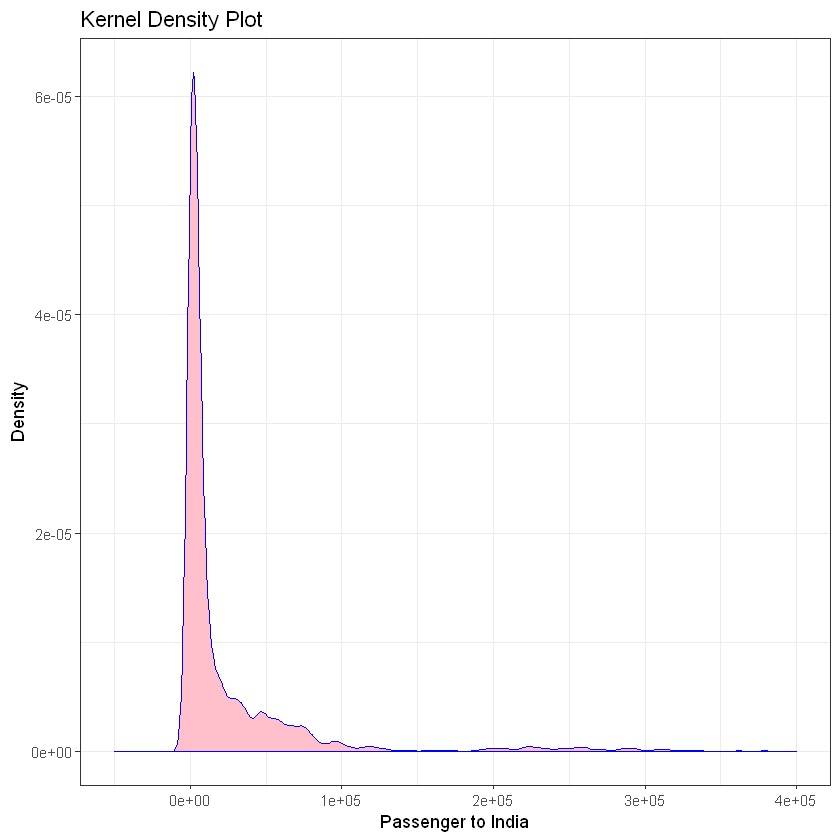

In [10]:
#Kernel Density Plot
ggplot(data1,aes(x=PASSENGERS.TO.INDIA))+
  geom_density(colour="blue",fill="pink")+
  scale_x_continuous(limits = c(-50000,400000))+
  theme_bw()+
  ggtitle("Kernel Density Plot")+
  labs(x="Passenger to India", y= "Density")

Warning message:
"Removed 304 rows containing non-finite values (stat_boxplot)."

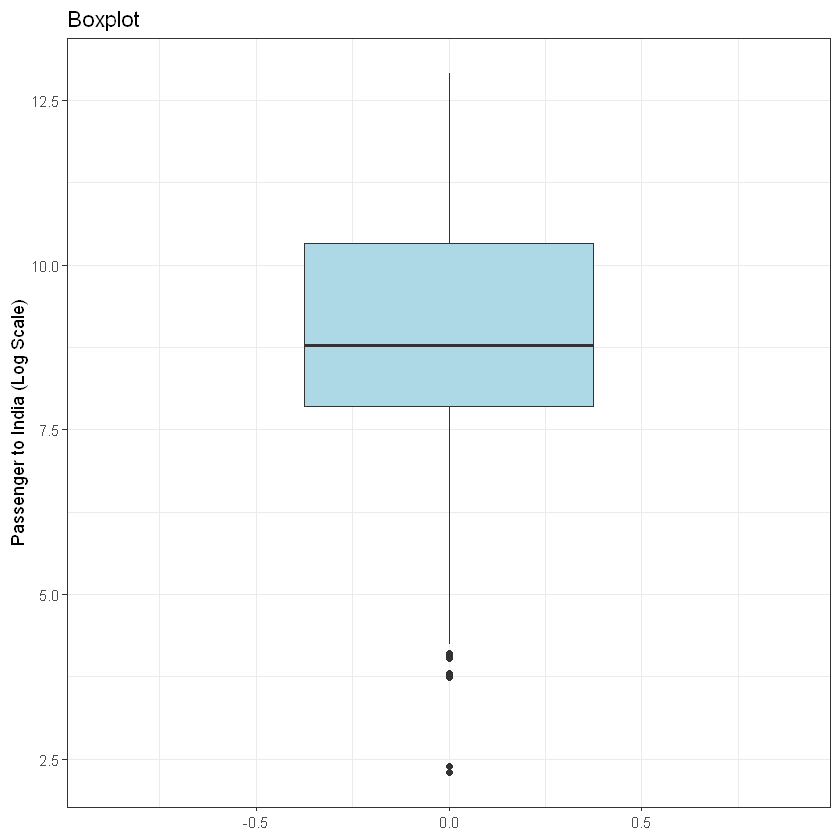

In [11]:
#boxplot
ggplot(data1, aes(y = log(PASSENGERS.TO.INDIA),base=10)) + 
  geom_boxplot(fill="lightblue")+
  theme_bw()+
  ggtitle("Boxplot")+
  labs(y="Passenger to India (Log Scale)")+
  scale_x_continuous(limit=c(-0.9,0.9))

In [12]:
#total passenger to india in year 2015, 2016 and 2017
data1%>%group_by(YEAR)%>%summarise(Total_Passenger=sum(PASSENGERS.TO.INDIA))

YEAR,Total_Passenger
2015,23781640
2016,26543689
2017,6778304


In [13]:
#Top 10 airlines carrying highest passenger to India
d1<-data1%>%
       group_by(AIRLINE.NAME)%>%
       summarise(Total_Passenger=sum(PASSENGERS.TO.INDIA))
head(arrange(d1,desc(d1$Total_Passenger)),10)

AIRLINE.NAME,Total_Passenger
JET AIRWAYS,8320544
AIR INDIA,6417414
EMIRATES AIRLINE,5981862
AIR INDIA EXPRESS,3099689
ETIHAD AIRLINES,2715962
AIR ARABIA,1964928
INDIGO,1929303
OMAN AIR,1758656
QATAR AIRWAYS,1654189
SAUDIA,1587708


In [14]:
#Total passenger to India Quarter wise
data1 %>%
  group_by(YEAR, QUARTER) %>%
  summarise(Total_Passenger = sum(PASSENGERS.TO.INDIA)) %>%
  spread(key = QUARTER, value = Total_Passenger)

YEAR,Q1,Q2,Q3,Q4
2015,5712230,5876964,5711102,6481344
2016,6343530,6521248,6515859,7163052
2017,6778304,NA,NA,NA


In [15]:
##Analysis on Passenger from India
summary(data1$PASSENGERS.FROM.INDIA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1629    5264   25453   23419  400155 

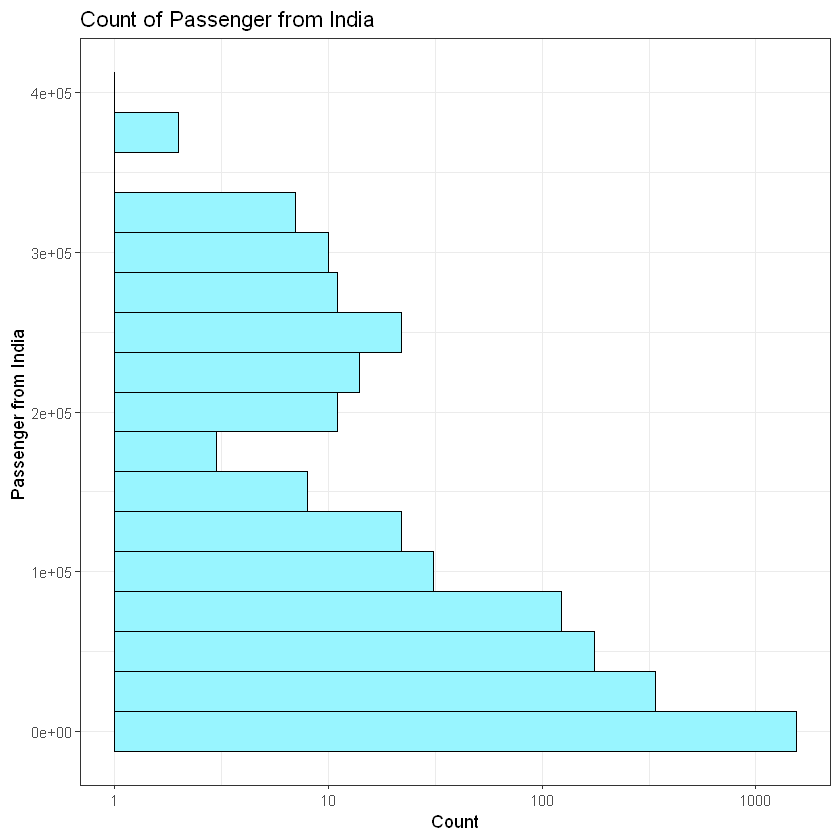

In [16]:
#Histogram showing passenger from india vs count
ggplot(data1,aes(x=PASSENGERS.FROM.INDIA))+
  geom_histogram(binwidth = 25000,fill="cadetblue1",col="black")+
  scale_y_continuous(trans="log10")+
  theme_bw()+
  coord_flip()+
  labs(x="Passenger from India ", y="Count") +
  ggtitle("Count of Passenger from India")

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

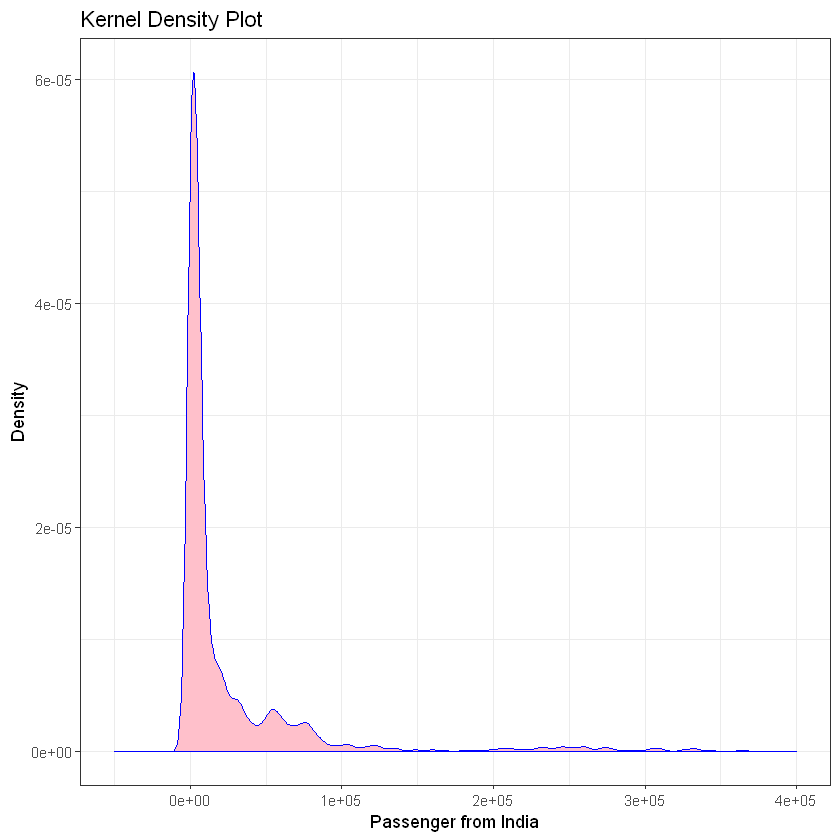

In [17]:
#Kernel Density Plot
ggplot(data1,aes(x=PASSENGERS.FROM.INDIA))+
  geom_density(colour="blue",fill="pink")+
  scale_x_continuous(limits = c(-50000,400000))+
  theme_bw()+
  ggtitle("Kernel Density Plot")+
  labs(x="Passenger from India", y= "Density")

Warning message:
"Removed 283 rows containing non-finite values (stat_boxplot)."

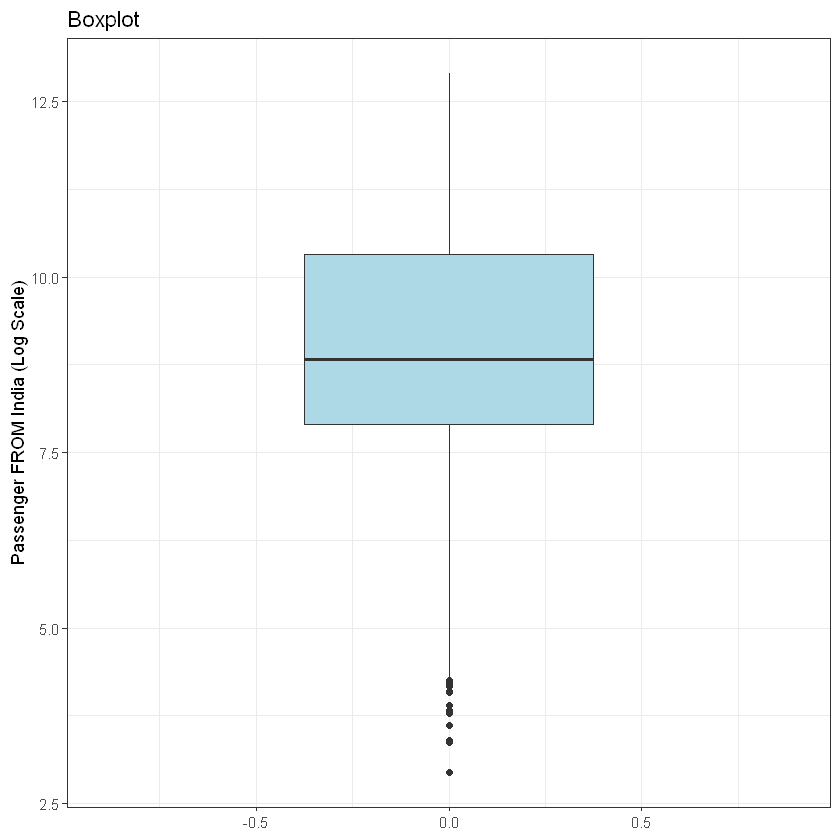

In [18]:
#boxplot
ggplot(data1, aes(y = log(PASSENGERS.FROM.INDIA),base=10)) + 
  geom_boxplot(fill="lightblue")+
  theme_bw()+
  ggtitle("Boxplot")+
  labs(y="Passenger FROM India (Log Scale)")+
  scale_x_continuous(limit=c(-0.9,0.9))

In [19]:
#total passenger from india in year 2015, 2016 and 2017
data1%>%group_by(YEAR)%>%summarise(Total_Passenger=sum(PASSENGERS.FROM.INDIA))

YEAR,Total_Passenger
2015,24858956
2016,27122472
2017,7424671


In [20]:
#Top 10 airlines carrying highest passenger from India
d2<-data1%>%group_by(AIRLINE.NAME)%>%summarise(Total_Passenger=sum(PASSENGERS.FROM.INDIA))
head(arrange(d2,desc(d2$Total_Passenger)),10)

AIRLINE.NAME,Total_Passenger
JET AIRWAYS,8471096
AIR INDIA,6495056
EMIRATES AIRLINE,6214850
AIR INDIA EXPRESS,3433720
ETIHAD AIRLINES,2813097
INDIGO,2044693
AIR ARABIA,2031394
OMAN AIR,1802529
SAUDIA,1701301
QATAR AIRWAYS,1646102


In [21]:
#Total passenger from India Quarter wise
data1%>%
  group_by(QUARTER,YEAR)%>%
  summarise(Total_Passenger=sum(PASSENGERS.FROM.INDIA))%>%
  spread(key = QUARTER,value = Total_Passenger)

YEAR,Q1,Q2,Q3,Q4
2015,6376365,6276379,6064483,6141729
2016,6871288,6775745,6802518,6672921
2017,7424671,NA,NA,NA


In [22]:
##Analysis on Freight to India
summary(data1$PASSENGERS.TO.INDIA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1484    4954   24466   23284  402497 

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 5 rows containing missing values (geom_bar)."

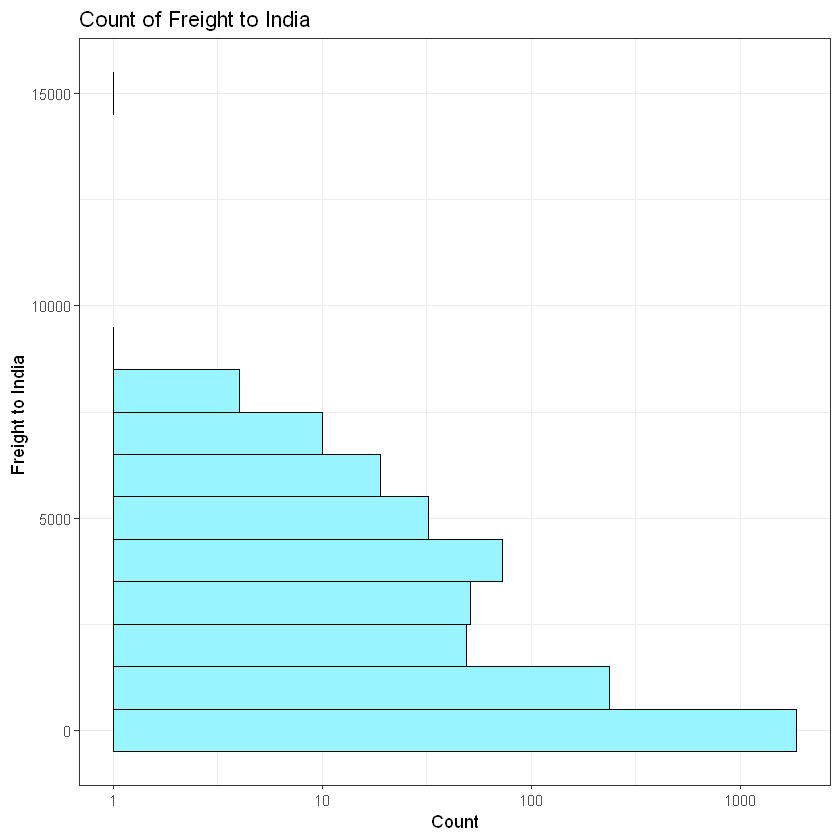

In [23]:
#Histogram showing freight to India vs count
ggplot(data1,aes(x=FREIGHT.TO.INDIA))+
  geom_histogram(binwidth = 1000,fill="cadetblue1",col="black")+
  scale_y_continuous(trans="log10")+
  theme_bw()+
  coord_flip()+
  labs(x="Freight to India ", y="Count") +
  ggtitle("Count of Freight to India")

Warning message:
"Removed 51 rows containing non-finite values (stat_density)."

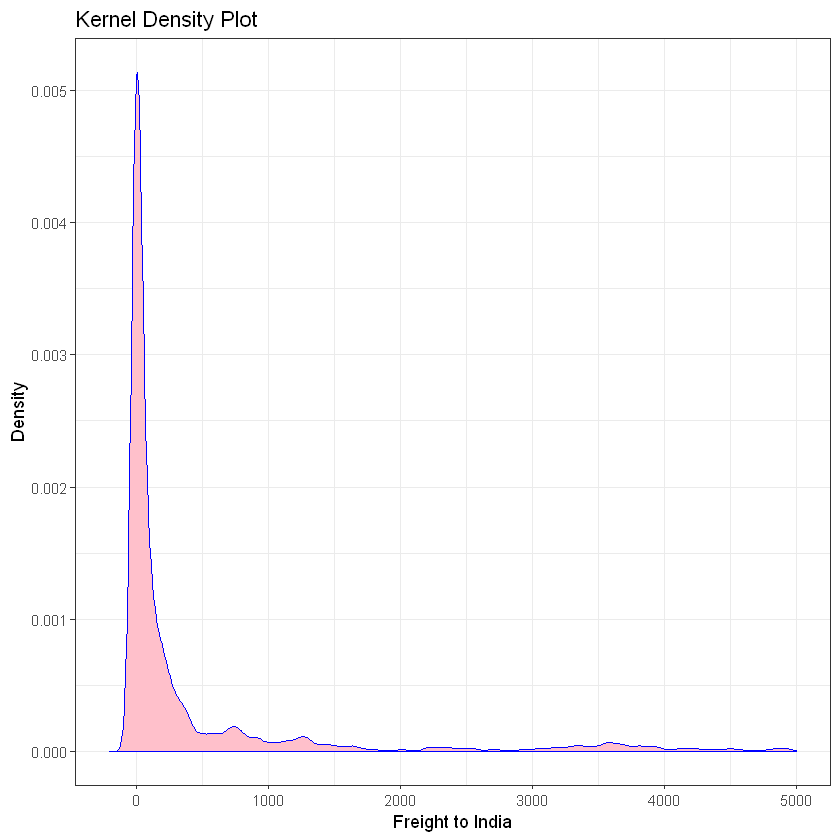

In [24]:
#Kernel Density Plot
ggplot(data1,aes(x=FREIGHT.TO.INDIA))+
  geom_density(colour="blue",fill="pink")+
  scale_x_continuous(limits = c(-200,5000))+
  theme_bw()+
  ggtitle("Kernel Density Plot")+
  labs(x="Freight to India", y= "Density")

Warning message:
"Removed 648 rows containing non-finite values (stat_boxplot)."

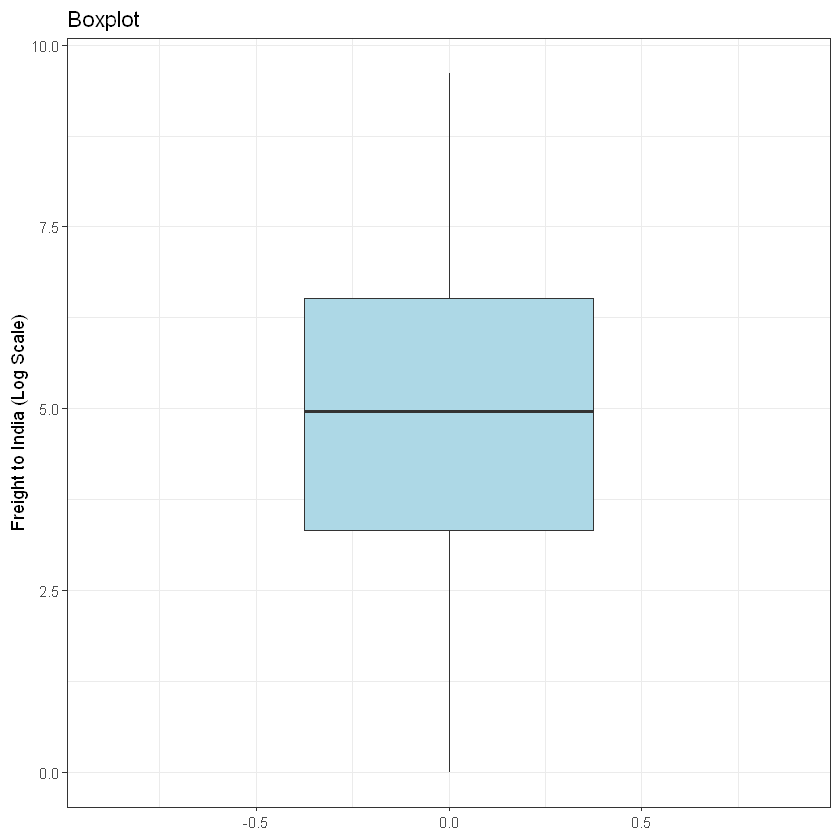

In [25]:
#boxplot
ggplot(data1, aes(y = log(FREIGHT.TO.INDIA),base=10)) + 
  geom_boxplot(fill="lightblue")+
  theme_bw()+
  ggtitle("Boxplot")+
  labs(y="Freight to India (Log Scale)")+
  scale_x_continuous(limit=c(-0.9,0.9))

In [26]:
#total Freight to india in year 2015, 2016 and 2017
data1%>%group_by(YEAR)%>%summarise(Total_Freight=sum(FREIGHT.TO.INDIA))

YEAR,Total_Freight
2015,560380
2016,570138
2017,154531


In [27]:
#Top 10 airlines with highest Freight to India
d3<-data1%>%group_by(AIRLINE.NAME)%>%summarise(Total_Freight=sum(FREIGHT.TO.INDIA))
head(arrange(d3,desc(d3$Total_Freight)),10)

AIRLINE.NAME,Total_Freight
CATHAY PACIFIC,181439
EMIRATES AIRLINE,140902
JET AIRWAYS,116442
AIR INDIA,101262
LUFTHANSA,91516
SINGAPORE AIRLINES,85251
QATAR AIRWAYS,83329
THAI AIRWAYS,62187
BRITISH AIRWAYS,36203
FEDERAL EXPRESS,33370


In [28]:
#Total Freight to India Quarter wise
data1%>%
  group_by(QUARTER,YEAR)%>%
  summarise(Total_Freight=sum(FREIGHT.TO.INDIA))%>%
  spread(key = QUARTER,value= Total_Freight)

YEAR,Q1,Q2,Q3,Q4
2015,126297,138654,150549,144880
2016,134139,137073,145538,153388
2017,154531,NA,NA,NA


In [29]:
##Analysis on freight from India 
summary(data1$FREIGHT.FROM.INDIA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     8.0   154.0   864.9   769.5 48640.0 

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 12 rows containing missing values (geom_bar)."

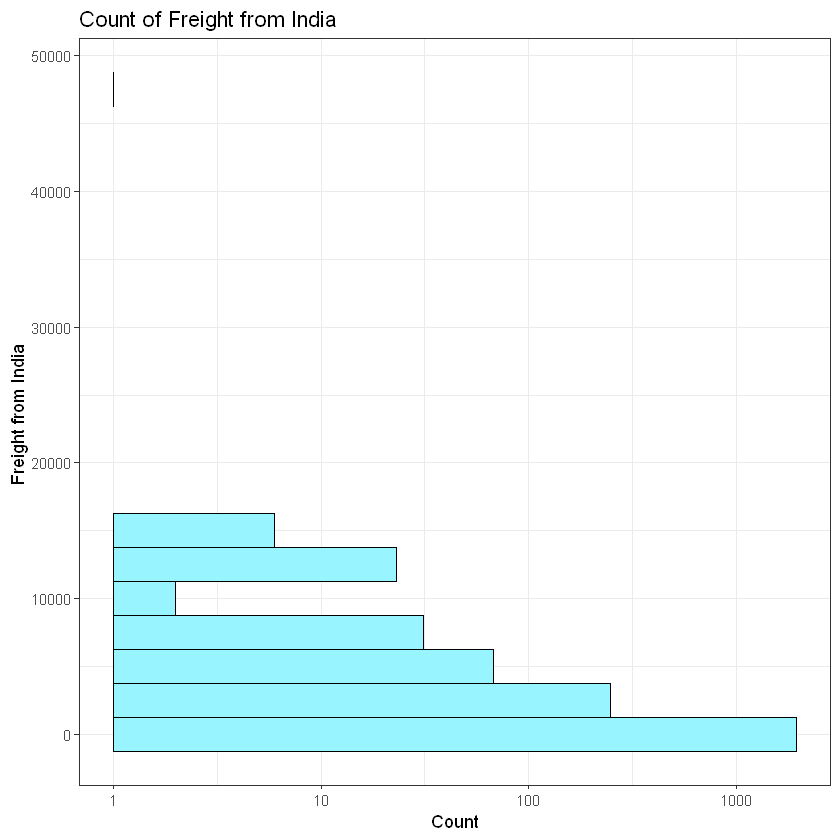

In [30]:
#Histogram showing freight from India vs count
ggplot(data1,aes(x=FREIGHT.FROM.INDIA))+
  geom_histogram(binwidth = 2500,fill="cadetblue1",col="black")+
  scale_y_continuous(trans="log10")+
  theme_bw()+
  coord_flip()+
  labs(x="Freight from India ", y="Count") +
  ggtitle("Count of Freight from India")

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

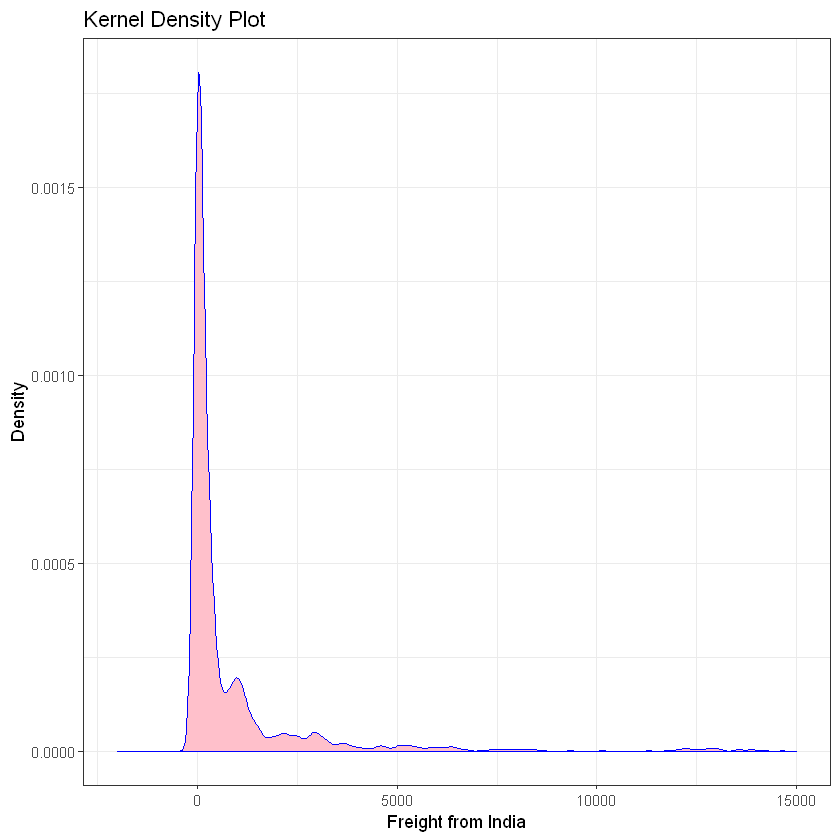

In [31]:
#Kernel Density Plot
ggplot(data1,aes(x=FREIGHT.FROM.INDIA))+
  geom_density(colour="blue",fill="pink")+
  scale_x_continuous(limits = c(-2000,15000))+
  theme_bw()+
  ggtitle("Kernel Density Plot")+
  labs(x="Freight from India", y= "Density")

Warning message:
"Removed 387 rows containing non-finite values (stat_boxplot)."

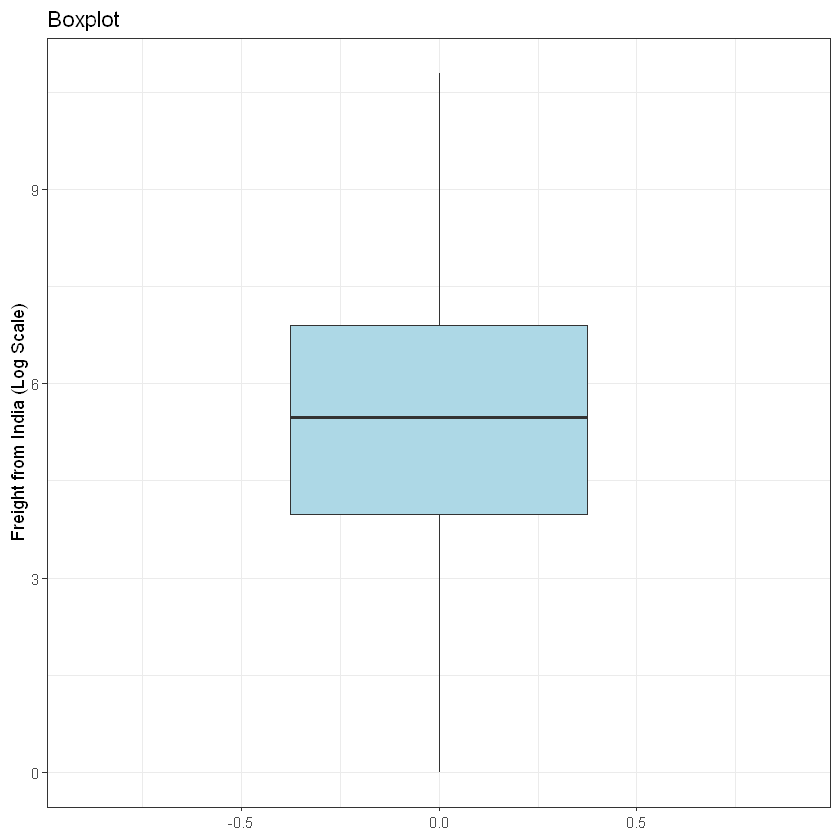

In [32]:
#boxplot
ggplot(data1, aes(y = log(FREIGHT.FROM.INDIA),base=10)) + 
  geom_boxplot(fill="lightblue")+
  theme_bw()+
  ggtitle("Boxplot")+
  labs(y="Freight from India (Log Scale)")+
  scale_x_continuous(limit=c(-0.9,0.9))

In [33]:
#total Freight from india in year 2015, 2016 and 2017
data1%>%
  group_by(YEAR)%>%
  summarise(Total_Freight=sum(FREIGHT.FROM.INDIA))

YEAR,Total_Freight
2015,887378
2016,892804
2017,238437


In [34]:
#Top 10 airlines with highest Freight from India
d4<-data1%>%group_by(AIRLINE.NAME)%>%summarise(Total_Freight=sum(FREIGHT.FROM.INDIA))
head(arrange(d4,desc(d4$Total_Freight)),10)

AIRLINE.NAME,Total_Freight
EMIRATES AIRLINE,347579
JET AIRWAYS,169015
QATAR AIRWAYS,147356
AIR INDIA,137331
CATHAY PACIFIC,116731
ETIHAD AIRLINES,107142
LUFTHANSA,88222
SINGAPORE AIRLINES,82566
SAUDIA,67260
BRITISH AIRWAYS,66785


In [35]:
#Total Freight from India Quarter wise
data1%>%
  group_by(QUARTER,YEAR)%>%
  summarise(Total_Freight=sum(FREIGHT.FROM.INDIA))%>%
  spread(key = QUARTER,value= Total_Freight)

YEAR,Q1,Q2,Q3,Q4
2015,213668,214620,205307,253783
2016,215744,231336,219572,226152
2017,238437,NA,NA,NA


In [36]:
###Analysis on most common months and most common quarters for travel

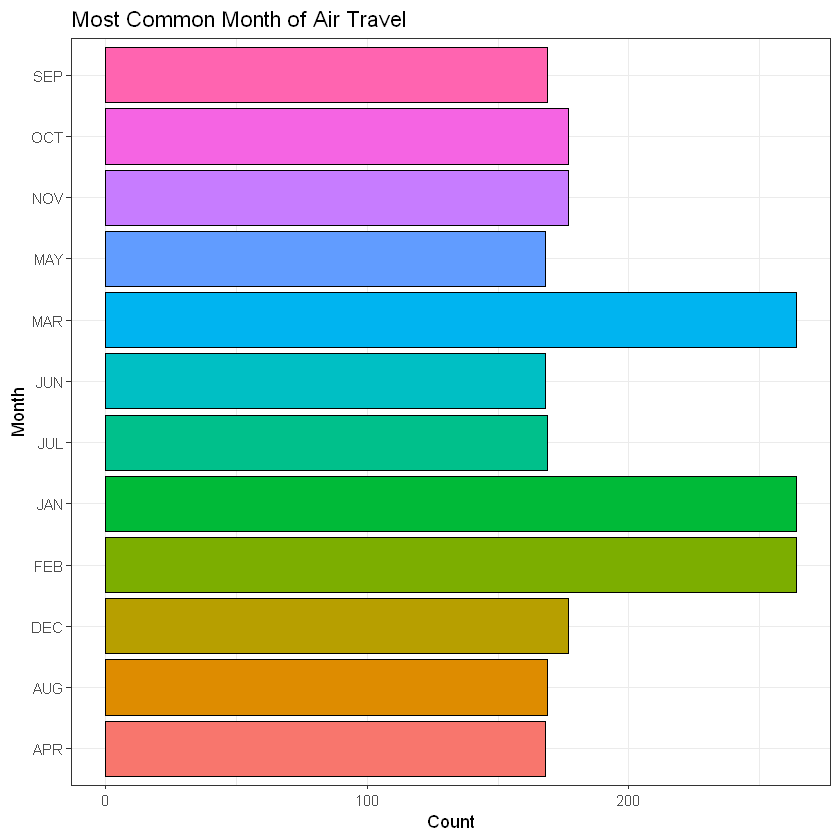

In [37]:
#Barplot on most common Months for Travel
ggplot(data1,aes(x=MONTH,fill=MONTH))+
  geom_bar(col="black")+
  theme_bw()+
  coord_flip()+
  labs(x="Month", y="Count") +
  ggtitle("Most Common Month of Air Travel")+
  theme(legend.position = "none")

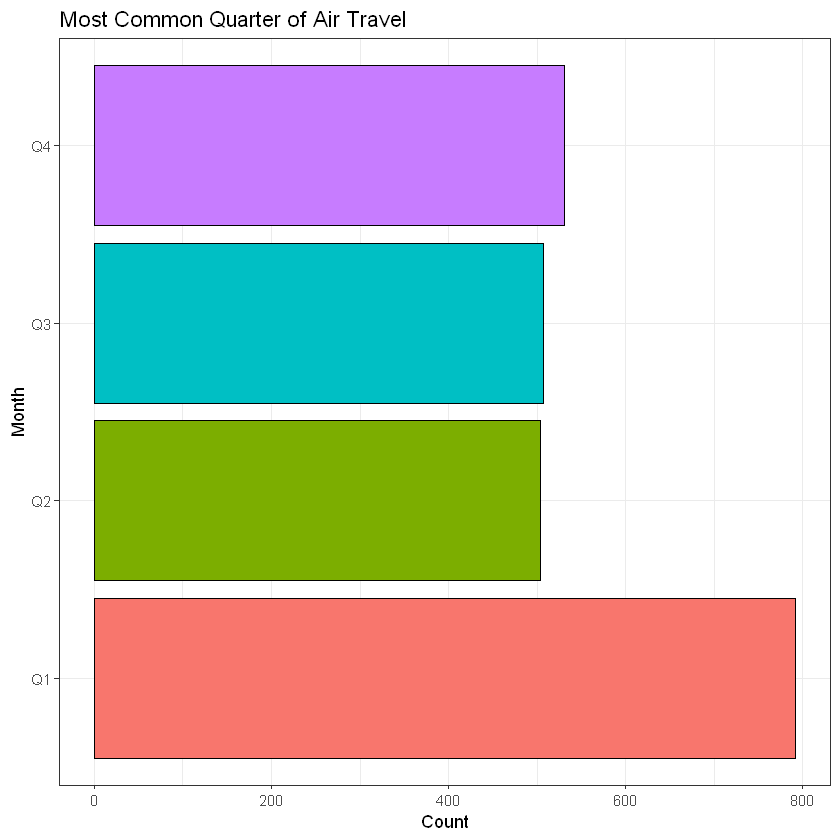

In [38]:
#Barplot on most common Quarter for Travel
ggplot(data1,aes(x=QUARTER,fill=QUARTER))+
  geom_bar(col="black")+
  theme_bw()+
  coord_flip()+
  labs(x="Month", y="Count") +
  ggtitle("Most Common Quarter of Air Travel")+
  theme(legend.position = "none")

In [39]:
###Bivariate Analysis

In [40]:
#Analysis on passengers to India and passengers from India

c1<-data1%>%group_by(YEAR)%>%summarise(Total_Passenger=sum(PASSENGERS.TO.INDIA))
c2<-data1%>%group_by(YEAR)%>%summarise(Total_Passenger=sum(PASSENGERS.FROM.INDIA))
c1c2<-data.frame(Year=c1$YEAR,Passenger_to_India=c1$Total_Passenger,Passenger_from_India=c2$Total_Passenger)

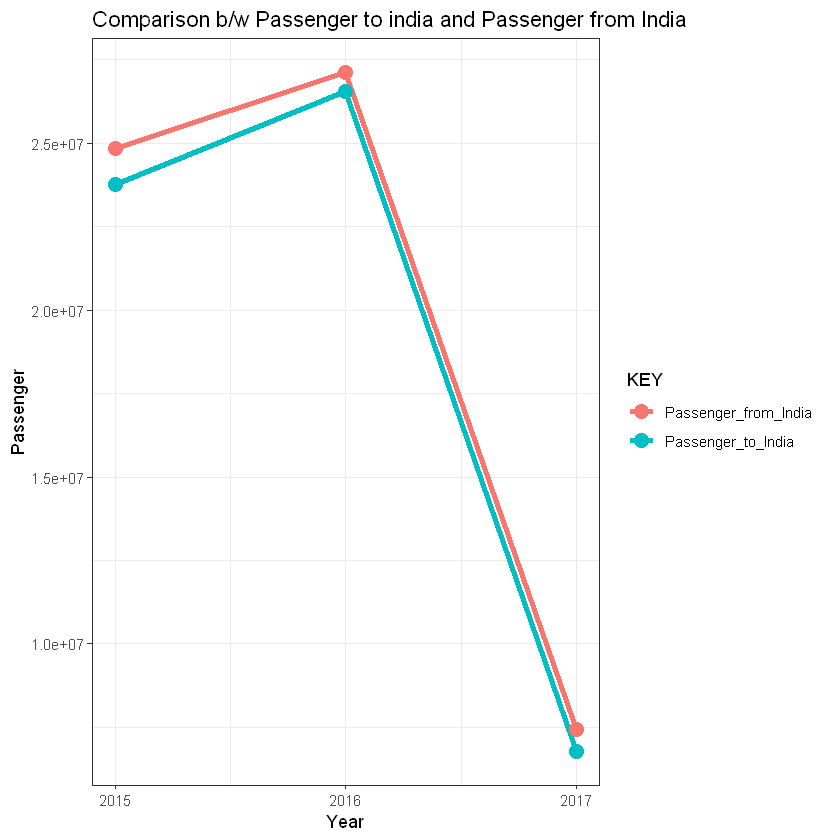

In [41]:
c1c2 %>%
  gather(KEY,Passenger, Passenger_to_India, Passenger_from_India) %>%
  ggplot(aes(x=Year,y=Passenger ,colour=KEY)) +
  geom_line(lwd=1.5)+
  geom_point(cex=4)+
  theme_bw()+
  ggtitle("Comparison b/w Passenger to india and Passenger from India")+
  scale_x_continuous(name = "Year", limits = c(2015, 2017), breaks = seq(2015, 2017, by = 1))

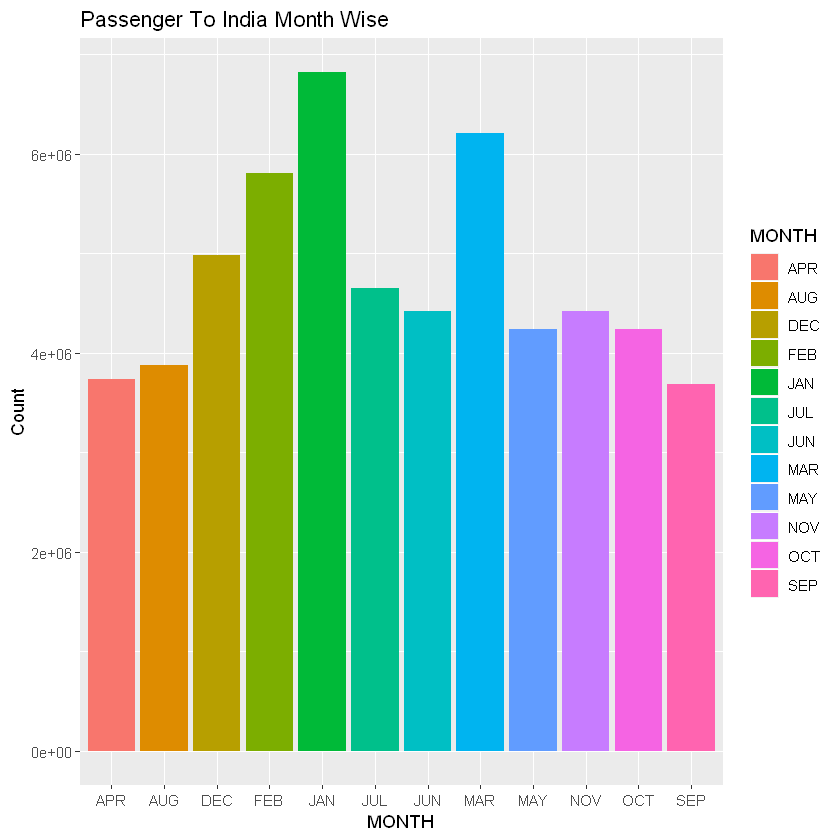

In [42]:
#Analysis on passengers to India and passengers from India with month

#Passenger to India Month wise
ggplot(data1, aes(x=MONTH, y=PASSENGERS.TO.INDIA,fill=MONTH)) +
  geom_bar(stat="identity") +
  labs(title="Passenger To India Month Wise", y="Count")

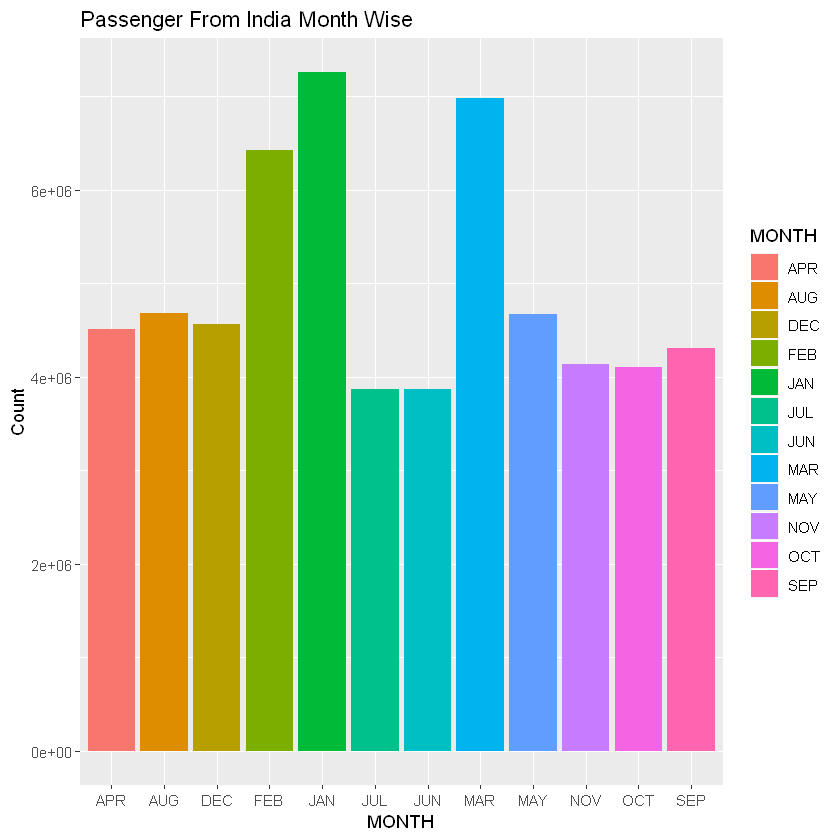

In [43]:
#Passenger from India Month Wise
ggplot(data1, aes(x=MONTH, y=PASSENGERS.FROM.INDIA,fill=MONTH)) +
  geom_bar(stat="identity") +
  labs(title="Passenger From India Month Wise", y="Count")

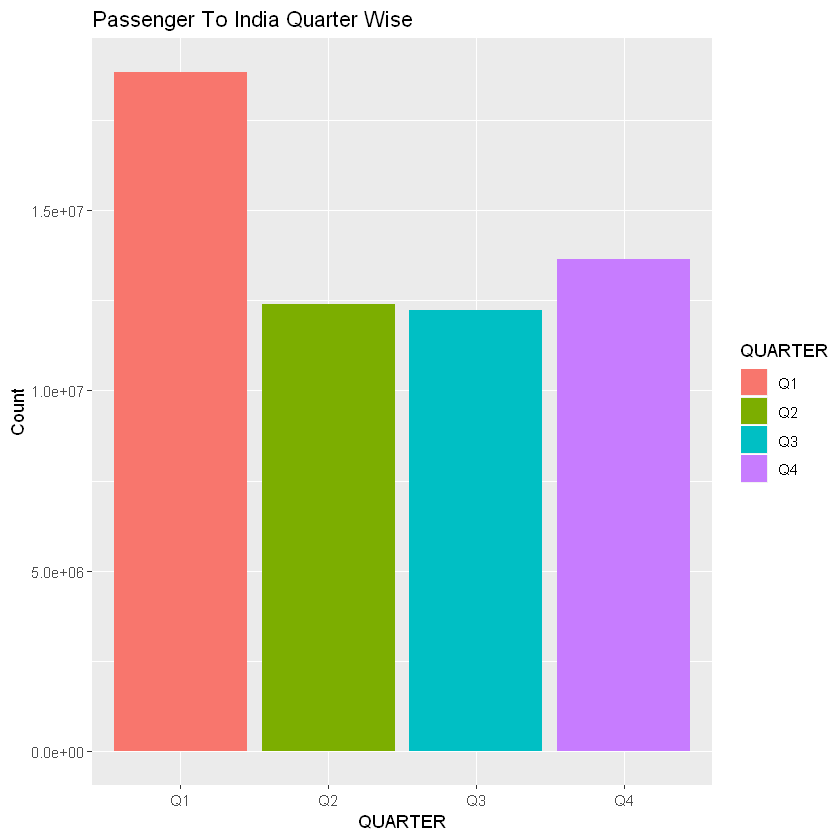

In [44]:
#Passenger to India Quarter wise
ggplot(data1, aes(x=QUARTER, y=PASSENGERS.TO.INDIA,fill=QUARTER)) +
  geom_bar(stat="identity") +
  labs(title="Passenger To India Quarter Wise", y="Count")

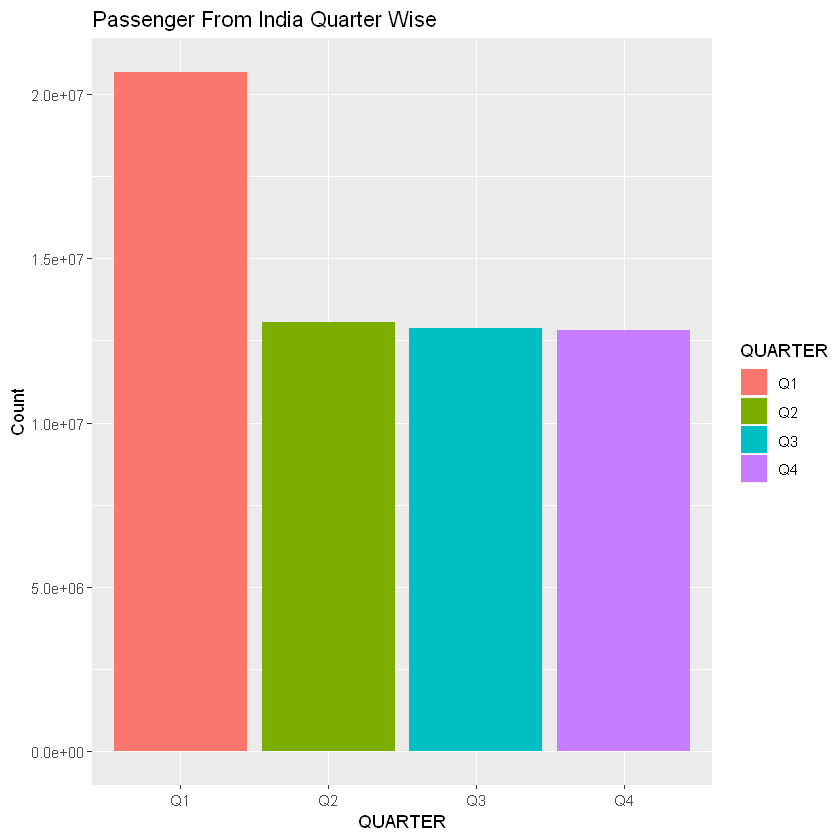

In [45]:
#Passenger from India Quarter wise
ggplot(data1, aes(x=QUARTER, y=PASSENGERS.FROM.INDIA,fill=QUARTER)) +
  geom_bar(stat="identity") +
  labs(title="Passenger From India Quarter Wise", y="Count")

In [46]:
#Analysis on freight to India and freight from India 

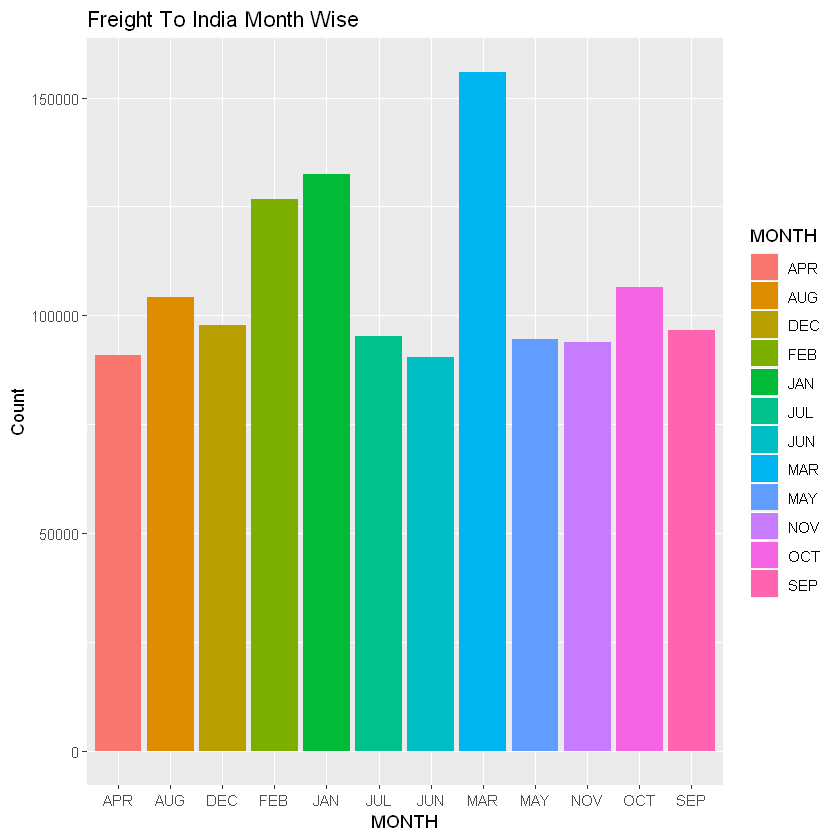

In [47]:
#Freight to India Month wise
ggplot(data1, aes(x=MONTH, y=FREIGHT.TO.INDIA,fill=MONTH)) +
  geom_bar(stat="identity") +
  labs(title="Freight To India Month Wise", y="Count")

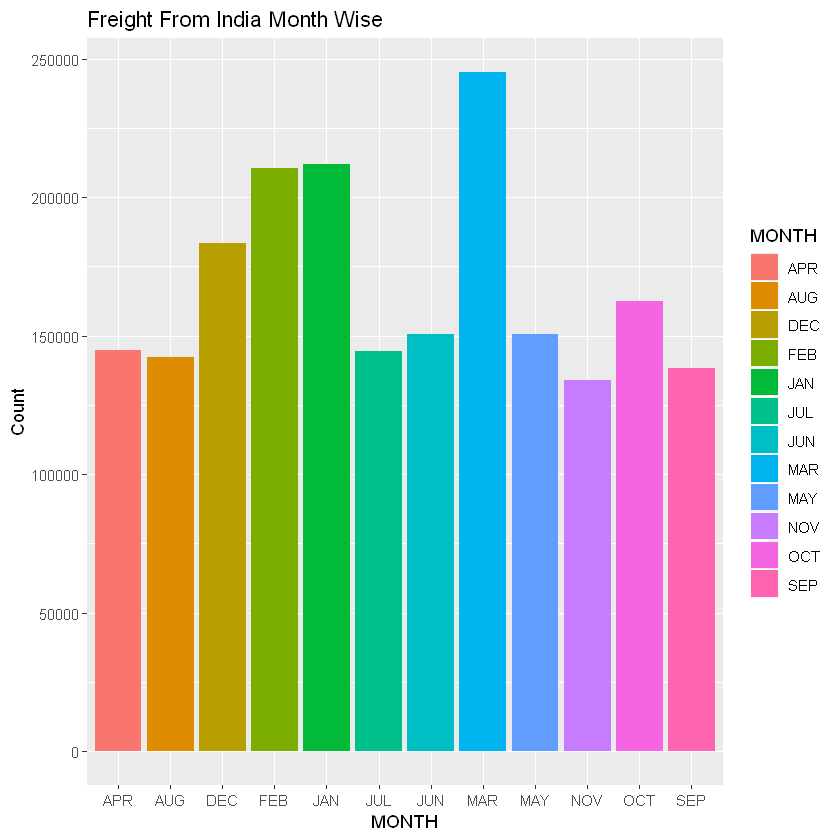

In [48]:
#Freight from India Month wise
ggplot(data1, aes(x=MONTH, y=FREIGHT.FROM.INDIA,fill=MONTH)) +
  geom_bar(stat="identity") +
  labs(title="Freight From India Month Wise", y="Count")

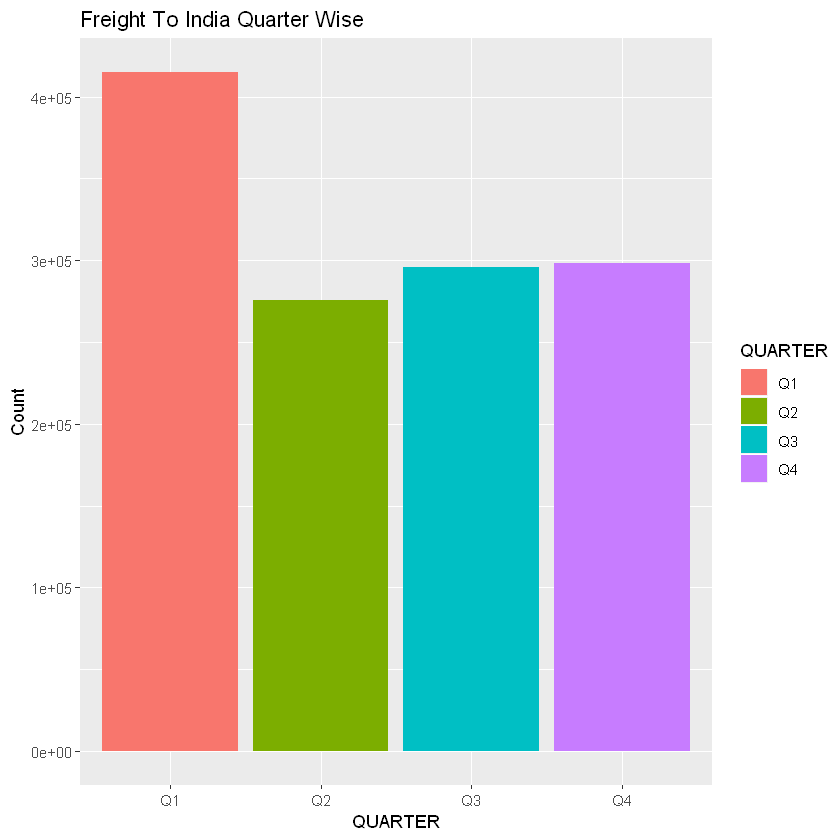

In [49]:
#Freight to India Quarter wise
ggplot(data1, aes(x=QUARTER, y=FREIGHT.TO.INDIA,fill=QUARTER)) +
  geom_bar(stat="identity") +
  labs(title="Freight To India Quarter Wise", y="Count")

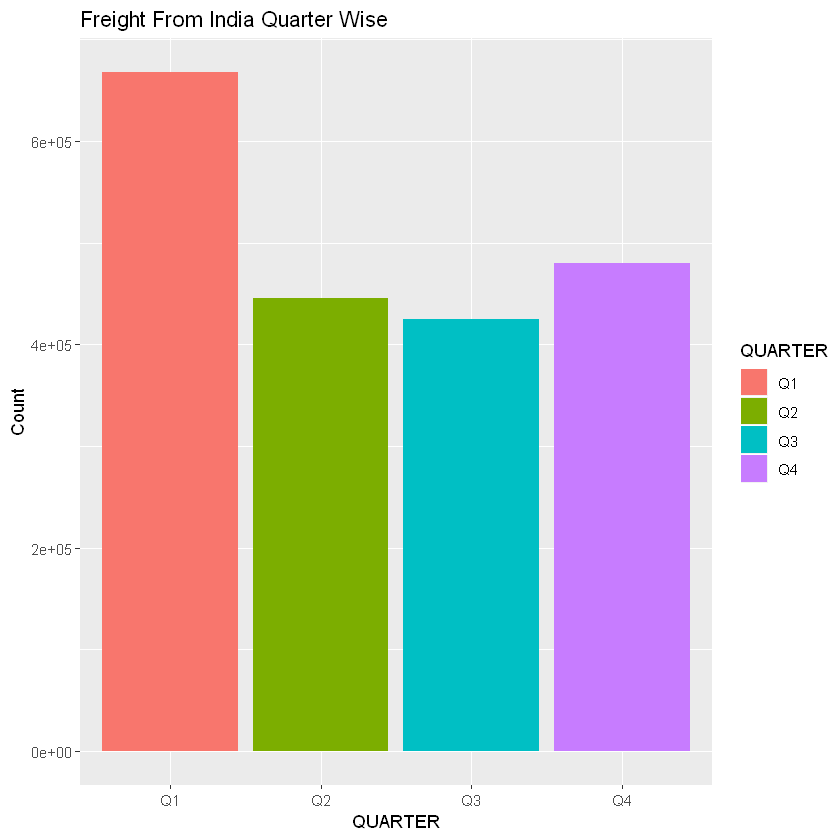

In [50]:
#Freight from India Quarter wise
ggplot(data1, aes(x=QUARTER, y=FREIGHT.FROM.INDIA,fill=QUARTER)) +
  geom_bar(stat="identity") +
  labs(title="Freight From India Quarter Wise", y="Count")